In [34]:
# RuiMing Li 
# Assignment 8 

In [70]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

df = pd.read_csv('DP_LIVE_14032022012743133.csv')
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.405,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.370,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.662,NaN


Text(0.5, 0, 'Year')

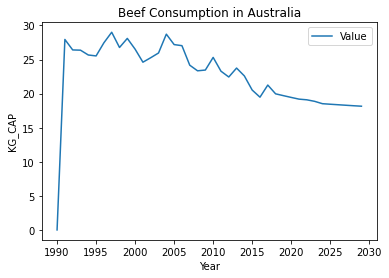

In [74]:
# Question 2 
# beef from aus
aus_meat = df
aus_meat = aus_meat.drop(aus_meat[(aus_meat['LOCATION'] != 'AUS')].index)
aus_meat = aus_meat.drop(aus_meat[(aus_meat['MEASURE'] != 'KG_CAP')].index)
aus_meat = aus_meat.drop(aus_meat[(aus_meat['SUBJECT'] != 'BEEF')].index)
# print(aus_meat)

aus_meat.plot(x='TIME', y='Value')
plt.title('Beef Consumption in Australia')
plt.ylabel("KG_CAP")
plt.xlabel("Year")

# The beef consumption has a spike during the 1990s and has decreased ever since. 

Text(0.5, 0, 'Year')

<Figure size 432x288 with 0 Axes>

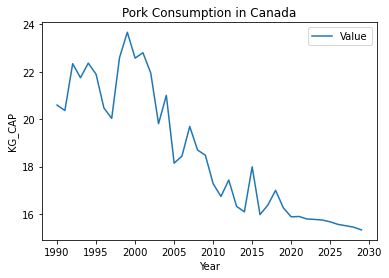

In [86]:

# pig from canada
can_meat = df
can_meat = can_meat.drop(can_meat[(can_meat['LOCATION'] != 'CAN')].index)
can_meat = can_meat.drop(can_meat[(can_meat['MEASURE'] != 'KG_CAP')].index)
can_meat = can_meat.drop(can_meat[(can_meat['SUBJECT'] != 'PIG')].index)

plt.figure(1)
can_meat.plot(x='TIME', y='Value')
plt.title('Pork Consumption in Canada')
plt.ylabel("KG_CAP")
plt.xlabel("Year")

# The pork consumption has a spike high during the 2000s and has decreased ever since. 

In [81]:
# Question 3 
# Extract the poultry consumption data, from 1994 to 2014 (inclusive), for Mexico, 
# that is measured in thousand tonnes of carcass weight**. Note: the filtered dataframe should only contain 
# the time and the values.

# poultry from mexico
poul_mexico = df
poul_mexico = poul_mexico.drop(poul_mexico[(poul_mexico['LOCATION'] != 'MEX')].index)
poul_mexico = poul_mexico.drop(poul_mexico[(poul_mexico['MEASURE'] != 'THND_TONNE')].index)
poul_mexico = poul_mexico.drop(poul_mexico[(poul_mexico['SUBJECT'] != 'POULTRY')].index)
poul_mexico = poul_mexico.drop(poul_mexico[(poul_mexico['TIME'] > 2014)].index)
poul_mexico = poul_mexico[["TIME", "Value"]]
print(poul_mexico)
    
    

      TIME     Value
9640  1990   848.035
9641  1991   995.553
9642  1992  1071.894
9643  1993  1261.100
9644  1994  1369.909
9645  1995  1515.516
9646  1996  1505.322
9647  1997  1750.495
9648  1998  1931.271
9649  1999  2080.252
9650  2000  2229.966
9651  2001  2351.655
9652  2002  2516.807
9653  2003  2686.007
9654  2004  2783.345
9655  2005  3029.620
9656  2006  3112.794
9657  2007  3167.940
9658  2008  3261.932
9659  2009  3314.587
9660  2010  3421.165
9661  2011  3532.197
9662  2012  3612.905
9663  2013  3690.316
9664  2014  3801.833


In [83]:
# (5 pts) Summarize the extracted data using descriptive statistics. Explain the summary.
poul_mexico.describe()
# The descriptive statistics for time is irrelevant. The mean for the value column is 2433.7 thousand tonnes. 
# The standard deviation is 948.1. THe minimum and maximum is 848.0 and 3801.8. 

,TIME,Value
count,25.000000,25.000000
mean,2002.000000,2433.696640
std,7.359801,948.120901
min,1990.000000,848.035000
25%,1996.000000,1515.516000
50%,2002.000000,2516.807000
75%,2008.000000,3261.932000
max,2014.000000,3801.833000


Text(0.5, 0, 'Year')

<Figure size 432x288 with 0 Axes>

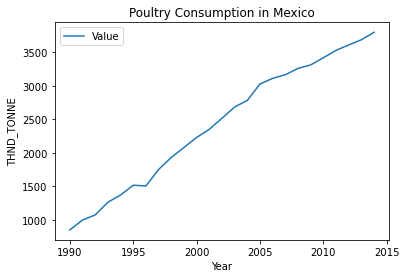

In [88]:
#(10 pts) Visualize the extracted data, using a line chart, and comment on the trend.
plt.figure(2)
poul_mexico.plot(x='TIME', y='Value')
plt.title('Poultry Consumption in Mexico')
plt.ylabel("THND_TONNE")
plt.xlabel("Year")

# The poultry consumption in Mexico has been increasing since 1990. 

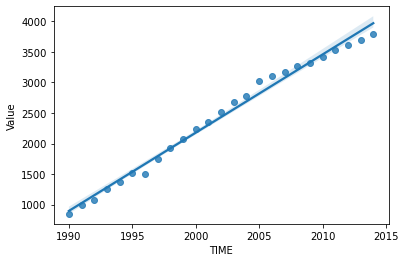

4099.533519999997
4227.674818461557


<AxesSubplot:>

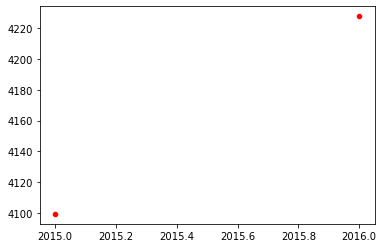

In [101]:
# (15 pts) Predict the poultry consumption for 2015 and 2016, using simple linear regression. E
# nsure that you visualize the original data and also include the predictions from the model.

#Lets visualize this data again and show the trend line
sns.regplot(data=poul_mexico, x='TIME', y='Value') #display the trend line using regplot
plt.show()

X = poul_mexico['TIME'].to_numpy() #get the explanatory variable
X = X.reshape(-1, 1)

y = poul_mexico['Value'].to_numpy()  #get the response variable
y = y.reshape(-1, 1)

lr_model = LinearRegression(fit_intercept=True) #initialize the regression model
lr_model = lr_model.fit(X, y)                   #fit the data to the model i.e. find the line of best fit


#make a prediction
predict2015 = np.array([2015]).reshape(-1, 1)
predict2016 = np.array([2016]).reshape(-1, 1)

y_2015 = lr_model.predict(predict2015)[0][0]
y_2016 = lr_model.predict(predict2016)[0][0]

print(y_2015) 
print(y_2016)

sns.scatterplot(x=[2015], y=[y_2015], color='red')
sns.scatterplot(x=[2016], y=[y_2016], color='red')

# The predicted consumption for 2015 will be 4099.53 and the predicted consumption for 2016 will be 4227.67 thousand 
# tonnes. 

In [100]:
# (5 pts) Calculate the R-squared and explain what this tells you about the model.
#get r-squared, i.e. the coefficient of determination
r_sqrd = lr_model.score(X, y)
r_sqrd = round(r_sqrd, 5)

print('r-squared is: ', r_sqrd)
 # Since r-squared is close to 1, this indicates that the model fits the data perfectly. 

r-squared is:  0.98943
